### Importing Required Libraries

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score

C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
base_folder = 'C:/Users/Uddipta Khandait/Desktop/Ivy/KAGGLE/Python/Titanic/'
data = pd.read_csv(base_folder + 'train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Categorical/String variables:
* Name
* Sex
* Ticket
* Cabin
* Embarked

## Numerical variables:
* PassengerId
* Pclass
* Age
* SibSp
* Parch
* Fare

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

# Sensible Value Imputation

* There are various ways for filling missing values. I am using simple median of the values for now.

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)

print(sum(data.Age.isna()))

0


# Explore Data

### Sex versus survival

In [7]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
print(survived_sex, dead_sex)

female    233
male      109
Name: Sex, dtype: int64 male      468
female     81
Name: Sex, dtype: int64


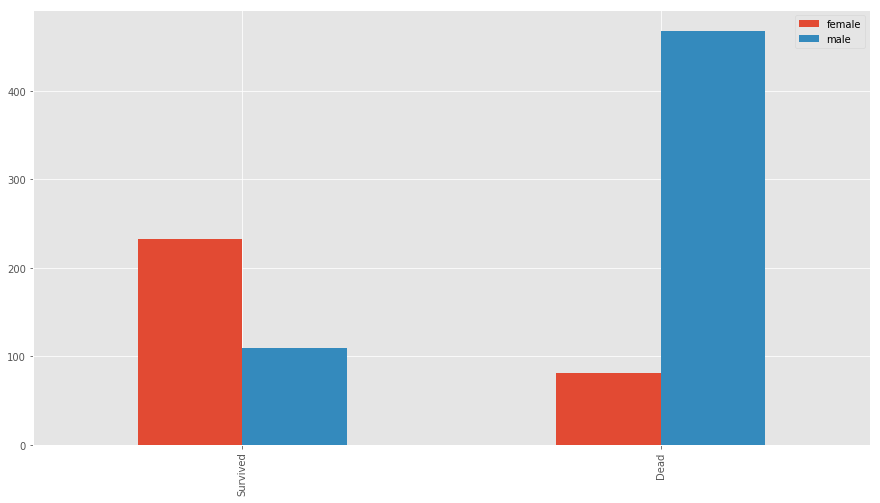

In [8]:
#plot the survived male , female and dead male,female
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', figsize=(15,8))

* Can be clearly seen from the above plot that the male death count rate is much more higher compared females.

### Age versus Survival

C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


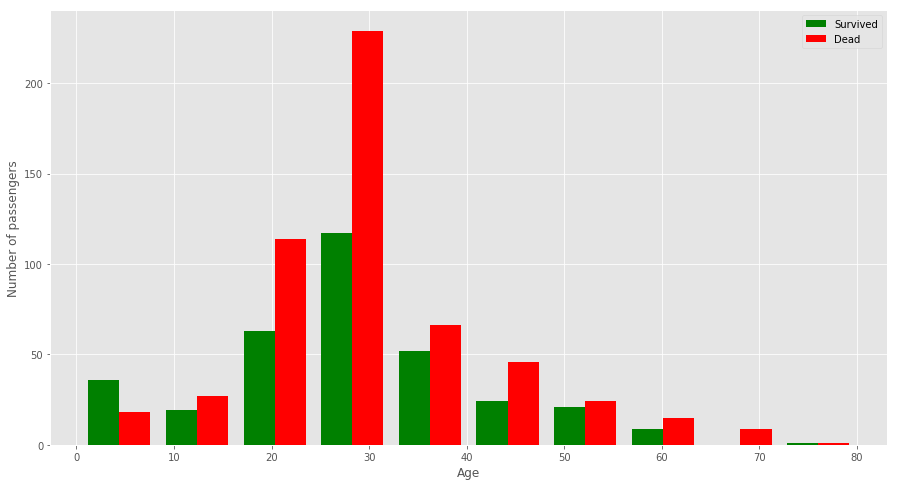

In [9]:
# dead and survived based on age of people
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

* Those in the range 20-40 are more likely to be dead.
* Those in the range 70-80 are almost always dead.
* 0-20 there is not much diff i think
* Making these as features would be a good idea?

### Fare versus survival

C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


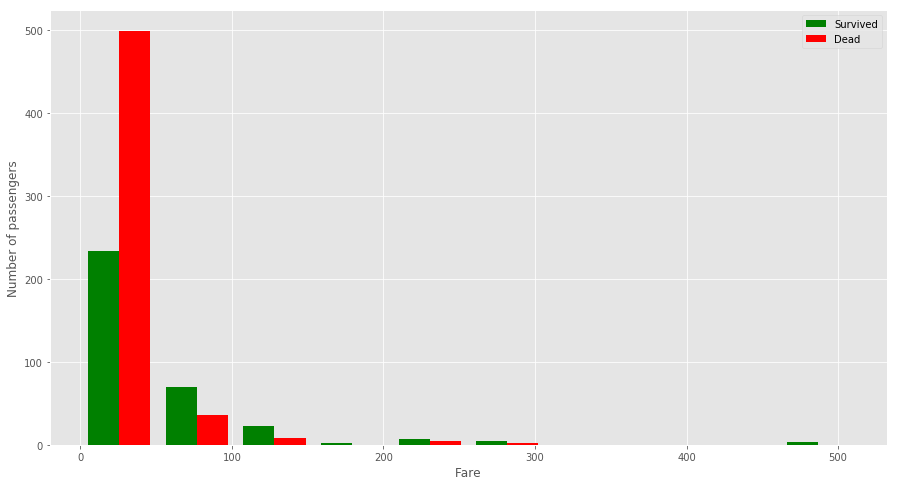

In [10]:
# plotting number of survivors based on the fare they gave
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

* Not exactly sure whether making <50 a feature will be a good idea? Although people less than 50 have high death rate!!
* But over the complete data set we cannot say anything from the fare alone

### Age versus Fare
* Survived
* Not Survied

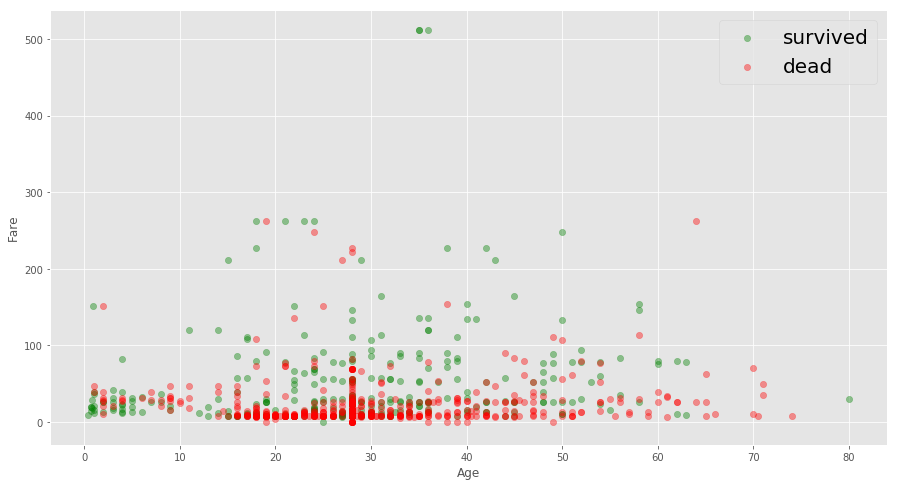

In [11]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40, alpha=0.4)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40,  alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=20,)

* Passengers with age between 20-40 are killed more.
* Passengers lower fares HAve lower chances of survival.

### Pclass versus survival

C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


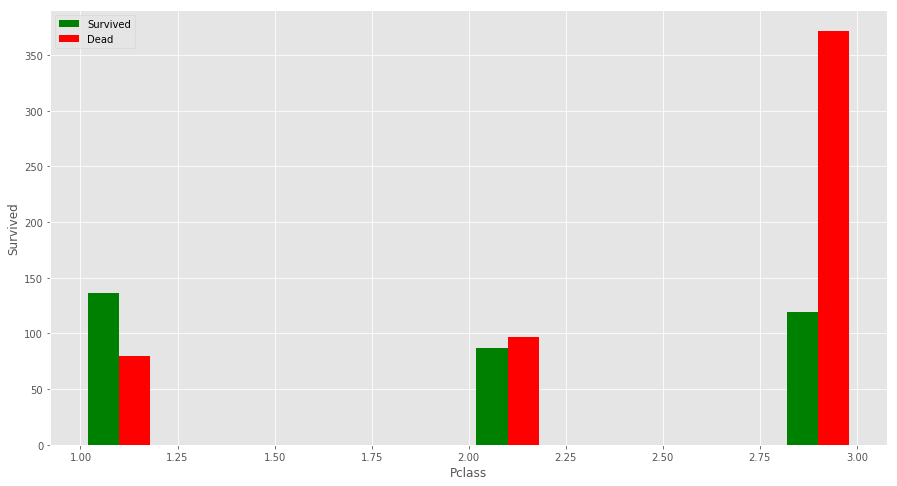

In [12]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set_ylabel('Survived')
ax.set_xlabel('Pclass')
ax.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']],color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

* So from the above we see pclass3 is mostly dead. Class might correspond to the status here!?
* That we can check from the fare they paid for a particular class!

### Pclass versus fare

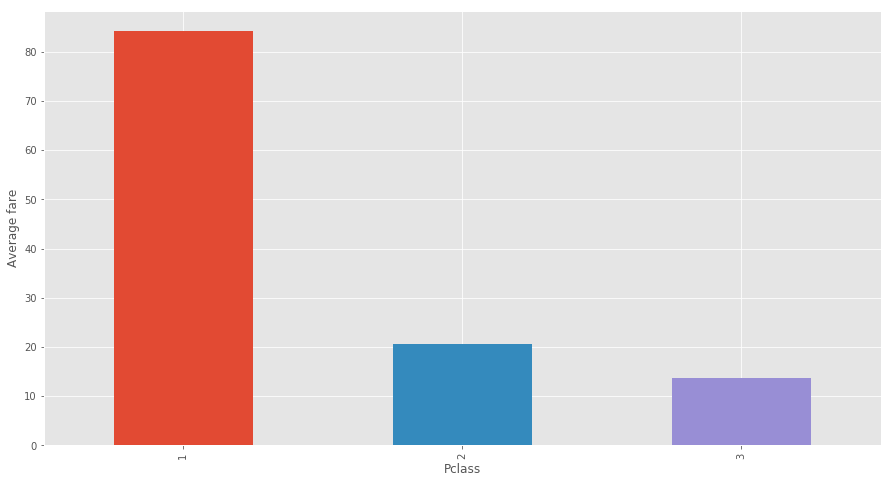

In [13]:
# Plotting how fares versus pclass goes?
ax = plt.subplot()
ax.set_ylabel('Average fare')
# we are plotting the mean cause the mean would show overall co-relation 
#rather than indivisual data points which may be unclear
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

* We can see the fare decreases from Pclass 1 to Pclass 3. 
* This shows correlation between Pclass and fare.

### Embarkment versus Survival

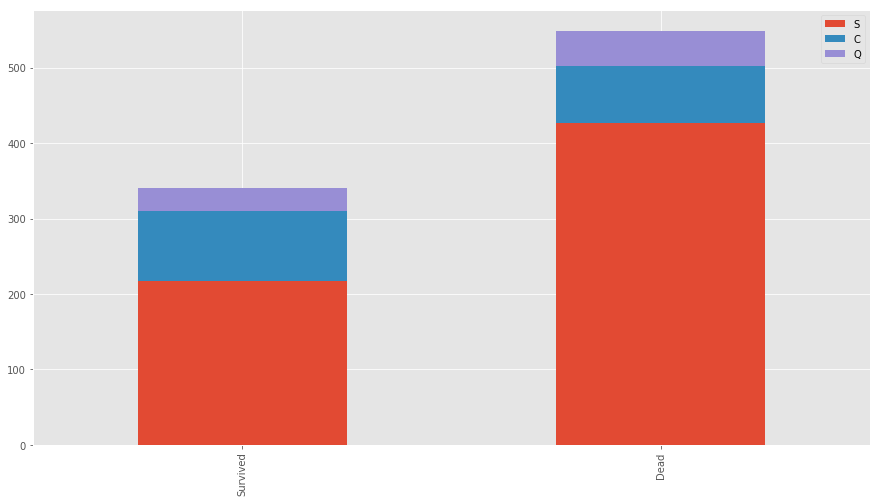

In [14]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

* Can't get any relation betweem embarked and survival rate.

# Feature Engineering

* Combining both the test and trainig data so that all the manipulations which are done happen on both the data sets.
* Also if test set has any missing values, it will easily come to notice here
* Survived column from the train set is dropped

In [15]:
def get_combined_data():
    train = pd.read_csv(base_folder + 'train.csv')
    test = pd.read_csv(base_folder + 'test.csv')
    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined
combined = get_combined_data()

In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


* We can see some variables have missing values
  * Fare
  * Cabin
  * Embarked
  * Age

# Sensible Value Imputation

* Filling missing values in both the test and the train data from those calculated from the training data

In [17]:
combined.Cabin.fillna('U',inplace=True)
combined.Embarked.fillna('S',inplace=True)
combined.Fare.fillna(data.Fare.mean(),inplace=True)
combined.Age.fillna(data.Age.median(), inplace=True)

### Family Size Feature

In [18]:
# The size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
# Introducing other features based on the family size
combined['Alone'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined['Small'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['Large'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)

C:\Users\Uddipta Khandait\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


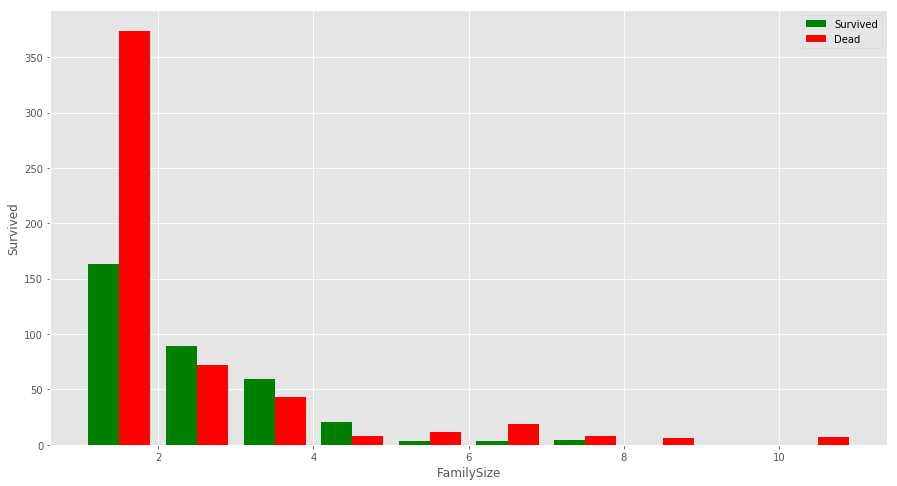

In [19]:
# The size of families on the training set
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set_ylabel('Survived')
ax.set_xlabel('FamilySize')
ax.hist([data[data['Survived']==1]['FamilySize'],data[data['Survived']==0]['FamilySize']],color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

* Passengers with small family of 2 or 3 have a higher chance of survival.
* We can see that survival rate of single passengers are very low.

### Title Feature

In [20]:
if 'Title' not in combined.columns:
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    combined['Title'] = combined.Title.map(Title_Dictionary)
    combined.drop('Name',axis=1,inplace=True)
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined.drop('Title',axis=1,inplace=True)
    combined = pd.concat([combined,titles_dummies],axis=1)

In [21]:
data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data['Title'] = data.Title.map(Title_Dictionary)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [22]:
survied_title = data[data['Survived']==1]['Title'].value_counts()
dead_title = data[data['Survived']==0]['Title'].value_counts()
print(survied_title, dead_title)

Miss       129
Mrs        101
Mr          81
Master      23
Officer      5
Royalty      3
Name: Title, dtype: int64 Mr         436
Miss        55
Mrs         26
Master      17
Officer     13
Royalty      2
Name: Title, dtype: int64


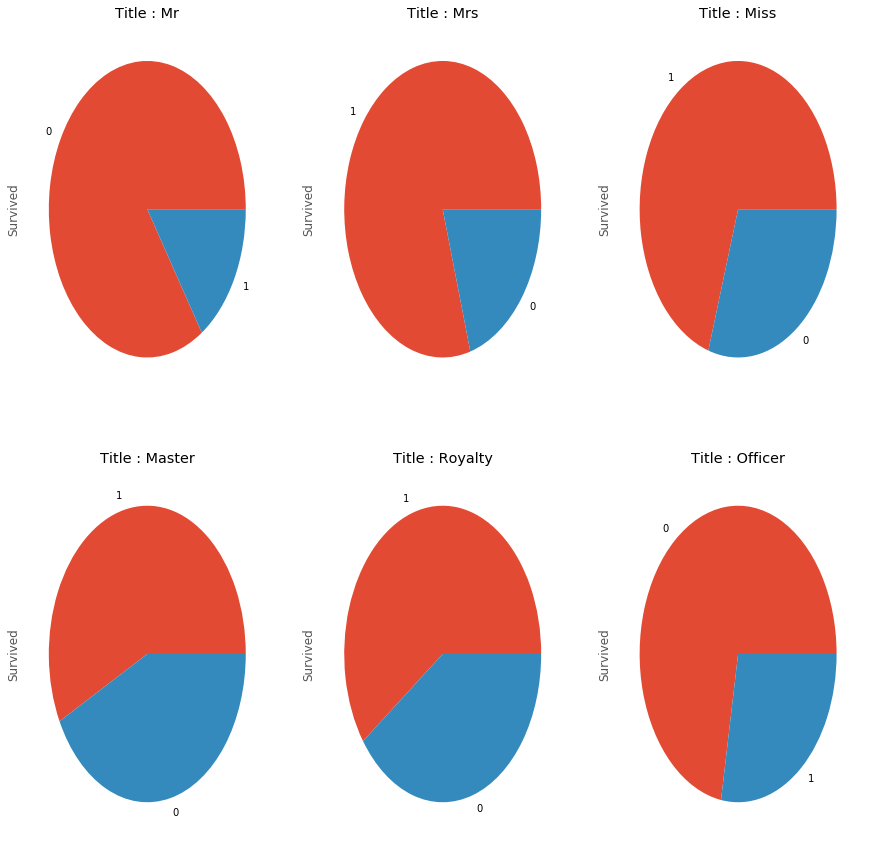

In [23]:
fig = plt.figure(figsize=(15,15))

i=1
for title in data['Title'].unique():
    fig.add_subplot(2, 3, i)
    plt.title('Title : {}'.format(title))
    data.Survived[data['Title'] == title].value_counts().plot(kind='pie')
    i += 1

* It can be seen that Titles have a effect on the survival rate.
* This can be a good feature

### Adding some categorical features

In [24]:
# new columns m planning to create are age ranges
# 10-20, 20-30 something like that
combined['20-40'] = combined['Age'].apply(lambda x: 1 if x>=20 and x<=40 else 0)
combined['70-80'] = combined['Age'].apply(lambda x: 1 if x>=70 and x<=80 else 0)


### Categorical to one-hot encoding

In [25]:
def get_one_hot_encoding(dt, features):
    for feature in features:
        if feature in dt.columns:
            dummies = pd.get_dummies(dt[feature],prefix=feature)
            dt = pd.concat([dt,dummies],axis=1)
    return dt

In [26]:
combined = get_one_hot_encoding(combined,['Embarked','Cabin','Pclass','Embarked','Title'])
combined['Sex'] = combined['Sex'].map({'male':0,'female':1})
combined.drop(['Embarked','Cabin','Pclass','Embarked','Title'],inplace=True,axis=1)

### Ticket feature extraction

In [27]:
def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        ticket = list(ticket)
        if (len(ticket)) > 0:
            return ticket[0]
        else: 
            return 'XXX'

combined['Ticket'] = combined['Ticket'].map(cleanTicket)

In [28]:
combined = get_one_hot_encoding(combined,'Ticket')
combined.drop('Ticket',axis=1,inplace=True)

# Normalise

In [29]:
columns = combined.columns
combined_new = pd.DataFrame(preprocessing.normalize(combined, axis=0, copy=True), columns=columns)
combined_new['PassengerId'] = combined['PassengerId']
combined = combined_new

In [30]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,FamilySize,Alone,Small,Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,20-40,70-80,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,...,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E39 E41,Cabin_E40,Cabin_E44,Cabin_E45,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E52,Cabin_E58,Cabin_E60,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.000000,0.018884,0.023939,0.0,0.003258,0.022465,0.000000,0.047836,0.0,0.0,0.00000,0.036346,0.000000,0.0,0.0,0.034159,0.0,0.000000,0.0,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.000000,0.0,0.033041
1,2,0.046324,0.032618,0.023939,0.0,0.032031,0.022465,0.000000,0.047836,0.0,0.0,0.00000,0.000000,0.070711,0.0,0.0,0.034159,0.0,0.060858,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.060858,0.0,0.000000
2,3,0.046324,0.022317,0.000000,0.0,0.003561,0.011232,0.035578,0.000000,0.0,0.0,0.06178,0.000000,0.000000,0.0,0.0,0.034159,0.0,0.000000,0.0,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.000000,0.0,0.033041
3,4,0.046324,0.030043,0.023939,0.0,0.023861,0.022465,0.000000,0.047836,0.0,0.0,0.00000,0.000000,0.070711,0.0,0.0,0.034159,0.0,0.000000,0.0,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055641,0.0,0.000000,0.000000,0.0,0.033041
4,5,0.000000,0.030043,0.000000,0.0,0.003617,0.011232,0.035578,0.000000,0.0,0.0,0.00000,0.036346,0.000000,0.0,0.0,0.034159,0.0,0.000000,0.0,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.0,0.037556,0.000000,0.0,0.033041


# Recover

In [31]:
train0 = pd.read_csv(base_folder + 'train.csv')
targets = train0.Survived
train = combined[0:891]
test = combined[891:]

# Feature Selection

In [32]:
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
cols =  features.sort_values(['importance'],ascending=False)['feature']
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
test_new = model.transform(test)

In [33]:
train_new.shape

(891, 24)

# Models

In [34]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [100, 200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8327721661054994
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 250}


In [35]:
ext = ExtraTreesClassifier()

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [100, 200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(ext,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8327721661054994
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}


In [36]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100)

cross_validation = StratifiedKFold(targets, n_folds=5)
adaboost.fit(train_new, targets)

print('Best score: {}'.format(cross_val_score(adaboost,train_new,targets,cv=10)))

Best score: [0.43333333 0.72222222 0.73033708 0.6741573  0.80898876 0.76404494
 0.83146067 0.80898876 0.82022472 0.61363636]


In [40]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators = 200)
extc =  ExtraTreesClassifier(criterion = 'entropy', max_depth = 5, n_estimators = 100)
# Train the model on training data
extc.fit(train_new, targets)
predictions = extc.predict(test_new)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = predictions
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

In [38]:
test

,PassengerId,Sex,Age,SibSp,Parch,Fare,FamilySize,Alone,Small,Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,20-40,70-80,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,...,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E39 E41,Cabin_E40,Cabin_E44,Cabin_E45,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E52,Cabin_E58,Cabin_E60,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,892,0.000000,0.029614,0.000000,0.000000,0.003518,0.011232,0.035578,0.000000,0.000000,0.000000,0.00000,0.036346,0.000000,0.0,0.000000,0.034159,0.0,0.000000,0.090167,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.000000,0.037556,0.000000,0.090167,0.000000
892,893,0.046324,0.040343,0.023939,0.000000,0.003145,0.022465,0.000000,0.047836,0.000000,0.000000,0.00000,0.000000,0.070711,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.000000,0.037556,0.000000,0.000000,0.033041
893,894,0.000000,0.053219,0.000000,0.000000,0.004353,0.011232,0.035578,0.000000,0.000000,0.000000,0.00000,0.036346,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.090167,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.060084,0.000000,0.000000,0.090167,0.000000
894,895,0.000000,0.023176,0.000000,0.000000,0.003893,0.011232,0.035578,0.000000,0.000000,0.000000,0.00000,0.036346,0.000000,0.0,0.000000,0.034159,0.0,0.000000,0.000000,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.000000,0.037556,0.000000,0.000000,0.033041
895,896,0.046324,0.018884,0.023939,0.029185,0.005521,0.033697,0.000000,0.047836,0.000000,0.000000,0.00000,0.000000,0.070711,0.0,0.000000,0.034159,0.0,0.000000,0.000000,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031404,0.000000,0.000000,0.037556,0.000000,0.000000,0.033041
896,897,0.000000,0.012017,0.000000,0.000000,0.004145,0.011232,0.035578,0.000000,0.000000,0.000000,0.00000,0.036346,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.033041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,